In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [86]:
df = pd.read_csv("https://rodeo-tutorials.s3.amazonaws.com/data/credit-data-non-null.csv")
df.head()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


<b>Exercise</b> <br>
Write a custom function called cap_value(x, cap) that will set x to the cap if x > cap. Then apply it to debt_ratio with a cap of 5.

In [87]:
def cap_value(x, cap):
    """
    x - a value
    cap - threshold value for x; if x > cap, then x is set to cap
    Examples:
        cap_value(1000, 10)
        10
        cap_value(10, 100)
        10
        """
    
    if (x>cap):
        return cap
    else:
        return x

In [88]:
print (cap_value(1000, 10)==10)
print (cap_value(10, 100)==10)
print (df.debt_ratio.apply(lambda x: cap_value(x, 5.0)).mean())

True
True
1.2869633745276574


<b>Exercise</b> <br>
Use groupby to calculate the percent of customers that went bad for each age

In [89]:
# understand the columns what they meant  https://sites.google.com/site/dmigkaggle/ 


In [90]:
badrep = df[['serious_dlqin2yrs', 'age']]

In [91]:
badrep.groupby("age")

In [92]:
rep = badrep.groupby("age")
rep = badrep.groupby("age").sum()
rep= rep.apply(lambda x: 100* x/x.sum()).reset_index()
rep.columns = ["Age" , "Percentage with Bad Credit"]

In [93]:
rep.head()

,Age,Percentage with Bad Credit
0,0,0.000000
1,21,0.129663
2,22,0.359066
3,23,0.698185
4,24,0.977459


2)Add a new column age_group for the dataframe. Divide the age into groups of every 10 years in ascending order, then rearrange the data to match the age_group categorization.
Display the first eight rows of data. Do some plotting to reflect it. Use age_group for
data aggregation on revolving_utilization_of_unsecured_lines and monthly_income.
Display the result

In [94]:
labels = ["{0} - {1}".format(i, i + 9) for i in range(0, 110, 10)]

df['age_group'] = pd.cut(df.age, range(0, 120, 10), right=False, labels=labels)

In [97]:
df= df.sort_values(by = "age")
df.head(8)

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents,age_group
52647,0,1.000000,0,1,0.436927,6000.0,6,0,2,0,2.0,0 - 9
32790,0,0.790419,21,0,11.000000,0.0,2,0,0,0,0.0,20 - 29
127195,0,0.878244,21,0,13.000000,0.0,1,0,0,0,0.0,20 - 29
47941,1,1.000000,21,0,0.000000,2600.0,1,0,0,0,0.0,20 - 29
42906,1,1.000000,21,98,0.000000,1300.0,0,98,0,98,0.0,20 - 29
58095,0,0.950100,21,0,0.011657,1200.0,1,0,0,0,0.0,20 - 29
80880,0,0.554890,21,0,0.004920,1625.0,1,0,0,0,0.0,20 - 29
108477,0,0.000000,21,0,0.000000,845.0,1,0,0,0,0.0,20 - 29


In [98]:
#plotting 

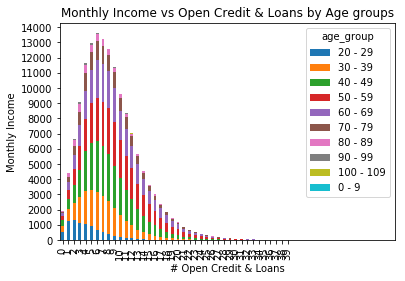

In [99]:
bar_width = 10
df.groupby(['number_of_open_credit_lines_and_loans','age_group'])['monthly_income'].size().unstack().plot(kind='bar',stacked=True)
plt.ylabel('Monthly Income')
plt.xlabel('# Open Credit & Loans')
plt.title('Monthly Income vs Open Credit & Loans by Age groups')
plt.yticks(np.arange(0, 15000, 1000))
plt.xticks(np.arange(0, 40, 1))
plt.show()

In [100]:
#data aggression

In [101]:
data = df[["age_group",'revolving_utilization_of_unsecured_lines','monthly_income', ]]

In [102]:
data.groupby("age_group").agg([np.min,np.mean,np.median, np.max])

revolving_utilization_of_unsecured_lines                      \
                                              amin      mean    median   
age_group                                                                
0 - 9                                          1.0  1.000000  1.000000   
10 - 19                                        NaN       NaN       NaN   
20 - 29                                        0.0  4.380330  0.465181   
30 - 39                                        0.0  9.198001  0.317422   
40 - 49                                        0.0  7.488347  0.237756   
50 - 59                                        0.0  6.489113  0.163325   
60 - 69                                        0.0  3.748979  0.086893   
70 - 79                                        0.0  3.893524  0.044548   
80 - 89                                        0.0  1.460974  0.024104   
90 - 99                                        0.0  0.125559  0.016109   
100 - 109                                      0.0  0.126687  0.025780   

                   monthly_income                                  
              amax           amin         mean  median       amax  
age_group                                                          
0 - 9          1.0         6000.0  6000.000000  6000.0     6000.0  
10 - 19        NaN            NaN          NaN     NaN        NaN  
20 - 29     8497.0            0.0  2554.771088  2200.0   159791.0  
30 - 39    22198.0            0.0  4807.072467  4166.0   251608.0  
40 - 49    20514.0            0.0  6150.727463  5250.0  1560100.0  
50 - 59    50708.0            0.0  6356.361406  5300.0  3008750.0  
60 - 69    11553.0            0.0  5651.115136  4500.0  1794060.0  
70 - 79     8831.0            0.0  4272.642085  3500.0   184903.0  
80 - 89     2050.0            0.0  3912.043707  3117.0   629000.0  
90 - 99        1.0            0.0  3611.887240  2549.5   203500.0  
100 - 109      1.0            0.0  1629.538462  1600.0     3417.0

3) Regroup data using number_real_estate_loans_or_lines and serious_dlqin2yrs, display
the first eight rows of data and do some plotting to reflect this it. Then do count, mean,
max, min on revolving_utilization_of_unsecured_lines and monthly_income. Display the
result. Then select the top five monthly_income values by group and display it.

In [103]:
redata = df.groupby(['number_real_estate_loans_or_lines',"serious_dlqin2yrs"])

In [104]:
'''for key, item in redata:
    print(redata.get_group(key), "\n\n")'''
  
        

'for key, item in redata:\n    print(redata.get_group(key), "\n\n")'

In [105]:
redata.head(8)

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents,age_group
52647,0,1.000000,0,1,0.436927,6000.0,6,0,2,0,2.0,0 - 9
32790,0,0.790419,21,0,11.000000,0.0,2,0,0,0,0.0,20 - 29
127195,0,0.878244,21,0,13.000000,0.0,1,0,0,0,0.0,20 - 29
47941,1,1.000000,21,0,0.000000,2600.0,1,0,0,0,0.0,20 - 29
42906,1,1.000000,21,98,0.000000,1300.0,0,98,0,98,0.0,20 - 29
58095,0,0.950100,21,0,0.011657,1200.0,1,0,0,0,0.0,20 - 29
80880,0,0.554890,21,0,0.004920,1625.0,1,0,0,0,0.0,20 - 29
108477,0,0.000000,21,0,0.000000,845.0,1,0,0,0,0.0,20 - 29
56512,0,0.301698,21,0,0.009677,929.0,2,0,0,0,0.0,20 - 29
20525,0,0.000000,21,0,0.000000,820.0,2,0,0,0,0.0,20 - 29


In [106]:
#plotting

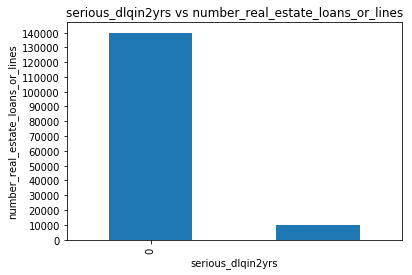

In [107]:
df.groupby(["serious_dlqin2yrs"])['number_real_estate_loans_or_lines'].size().plot(kind='bar',stacked=True)
plt.ylabel('number_real_estate_loans_or_lines')
plt.xlabel('serious_dlqin2yrs')
plt.title('serious_dlqin2yrs vs number_real_estate_loans_or_lines')
plt.yticks(np.arange(0, 150000, 10000))
plt.xticks(np.arange(0, 1, 1))
plt.show()

In [108]:
final =redata.agg({'revolving_utilization_of_unsecured_lines':['count',"min","mean", "max"],\
            'monthly_income':['count','min','mean', 'max']})
final

revolving_utilization_of_unsecured_lines  \
                                                                                       count   
number_real_estate_loans_or_lines serious_dlqin2yrs                                            
0                                 0                                                    51516   
                                  1                                                     4672   
1                                 0                                                    49590   
                                  1                                                     2748   
2                                 0                                                    29757   
                                  1                                                     1765   
3                                 0                                                     5878   
                                  1                                                      422   
4                                 0                                                     1976   
                                  1                                                      194   
5                                 0                                                      606   
                                  1                                                       83   
6                                 0                                                      272   
                                  1                                                       48   
7                                 0                                                      140   
                                  1                                                       31   
8                                 0                                                       70   
                                  1                                                       23   
9                                 0                                                       64   
                                  1                                                       14   
10                                0                                                       32   
                                  1                                                        5   
11                                0                                                       21   
                                  1                                                        2   
12                                0                                                       12   
                                  1                                                        6   
13                                0                                                       10   
                                  1                                                        5   
14                                0                                                        7   
15                                0                                                        4   
                                  1                                                        3   
16                                0                                                        3   
                                  1                                                        1   
17                                0                                                        3   
                                  1                                                        1   
18                                0                                                        2   
19                                0                                                        2   
20                                0                                                        1   
                                  1                                                        1   
21                  

In [109]:
monthly = final["monthly_income"]

In [110]:
monthly.sort_values(by= "max", ascending= False)


,,count,min,mean,max
number_real_estate_loans_or_lines,serious_dlqin2yrs,,,,
1,0,49590,0.0,5373.578847,3008750.0
4,0,1976,0.0,10878.380061,1560100.0
2,0,29757,0.0,6932.937191,1072500.0
0,0,51516,0.0,4015.097038,835040.0
16,0,3,5083.0,115249.666667,324000.0
5,0,606,0.0,11626.161716,287662.0
2,1,1765,0.0,6013.906516,250000.0
6,1,48,0.0,13798.229167,234600.0
13,0,10,0.0,26736.900000,151855.0
